# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1.   Do the users spend more time on the new landing page than on the existing landing page ?
2.   Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3.   Does the converted status depend on the preferred language?
4.   Is the time spent on the new page the same for the different language users?


## Import all the necessary libraries

In [4]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats

## Reading the Data into a DataFrame

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('.//drive//MyDrive//BusinessStatistics_Class//Project2//abtest.csv')
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
df.shape

(100, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [17]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [8]:
df.isnull().count()

user_id                   100
group                     100
landing_page              100
time_spent_on_the_page    100
converted                 100
language_preferred        100
dtype: int64

In [8]:
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [12]:
df[df['group'] == 'control'].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,50.0,546566.5000,17.677670,546493.00,546555.25,546567.50,546579.7500,546592.0
time_spent_on_the_page,50.0,4.5324,2.581975,0.19,2.72,4.38,6.4425,10.3


In [13]:
df[df['group'] == 'treatment'].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,50.0,546467.5000,14.577380,546443.00,546455.250,546467.500,546479.75,546492.00
time_spent_on_the_page,50.0,6.2232,1.817031,1.65,5.175,6.105,7.16,10.71


**Observations:**

*   Dataset has 100 rows and 6 columns
*   There are **no null rows or columns** in the dataset
*   There are **no duplicate**s in the dataset
*   Two numeric data types are user_id,  int64 and time_spent_on_the_page, float64. All other columns are object types
*   The mean time spent by all the users is 5.38. The average time spent by users on old page (control) is 4.53 and new page (treatment) is 6.22





### Univariate Analysis

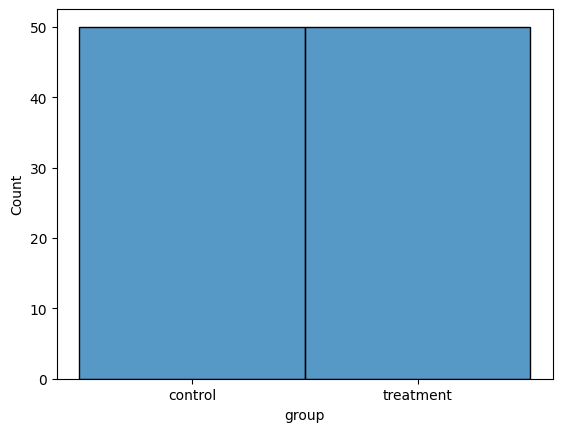

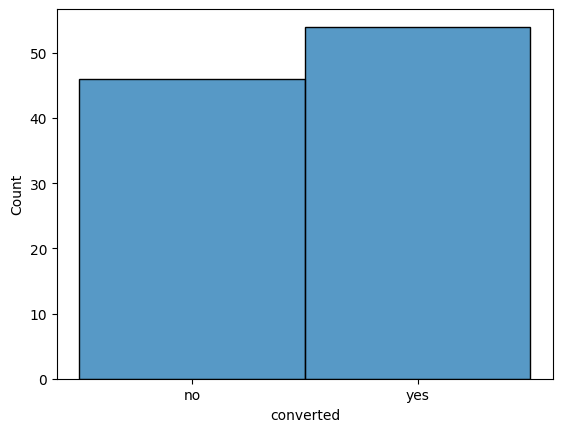

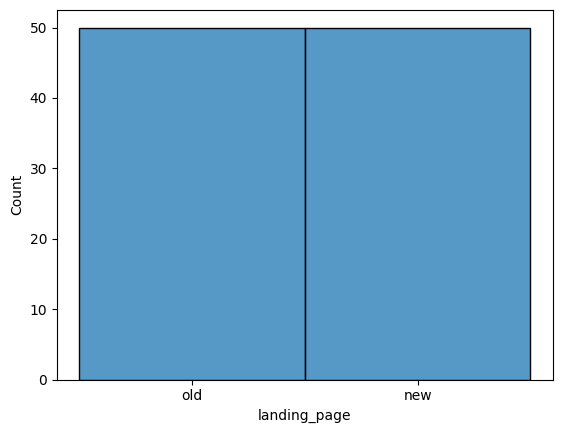

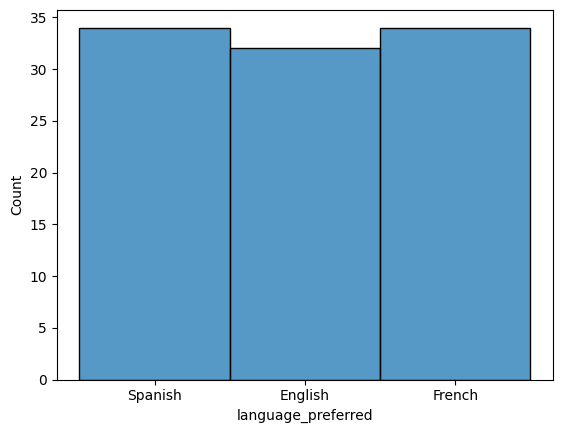

In [26]:
# Add a numeric column for converted column with yes = 1 and no = 0
df['converted_int'] = df['converted'].map({'yes': 1, 'no': 0})

sns.histplot(data=df,x='group')
plt.show()
sns.histplot(data=df,x='converted')
plt.show()
sns.histplot(data=df,x='landing_page')
plt.show()
sns.histplot(data=df,x='language_preferred')
plt.show()


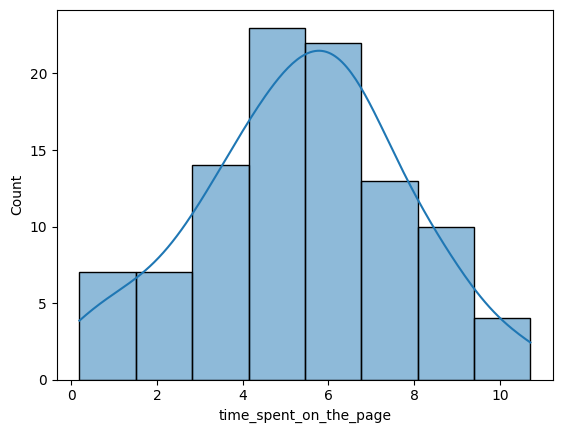

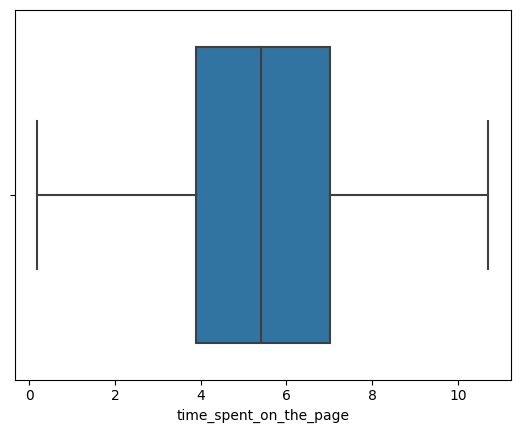

In [32]:
sns.histplot(data=df,x='time_spent_on_the_page', kde=True)
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

In [31]:
df.groupby('converted').count()

,user_id,group,landing_page,time_spent_on_the_page,language_preferred,converted_int
converted,,,,,,
no,46,46,46,46,46,46
yes,54,54,54,54,54,54


In [40]:
df.groupby('language_preferred').count()

,user_id,group,landing_page,time_spent_on_the_page,converted,converted_int
language_preferred,,,,,,
English,32,32,32,32,32,32
French,34,34,34,34,34,34
Spanish,34,34,34,34,34,34


**Observations:**

*  Sample count for both groups treatment and  control are same and it is 50
*  There are 54 users converted to new page and 46 are not.
*  There are no outliners in the dataset
*  Most of the users spent between 4 to 7 mins of their time.
*  French and Spanish are preferred languages than English.





### Bivariate Analysis

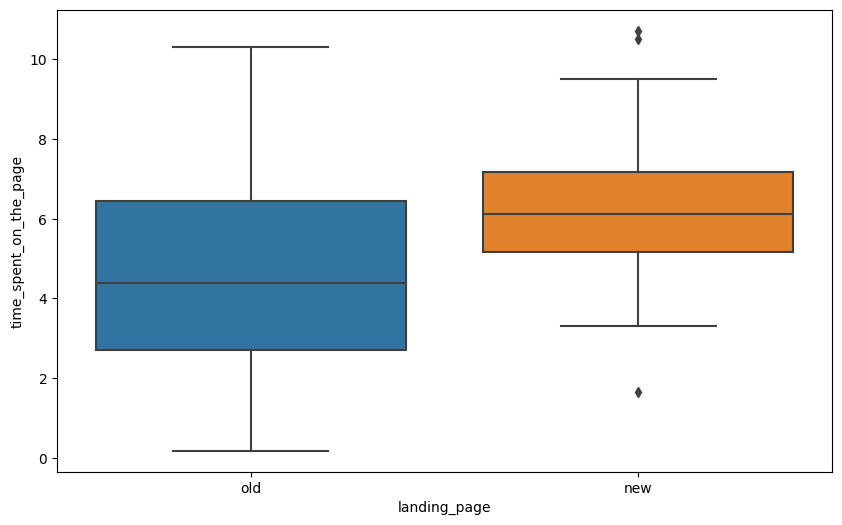

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

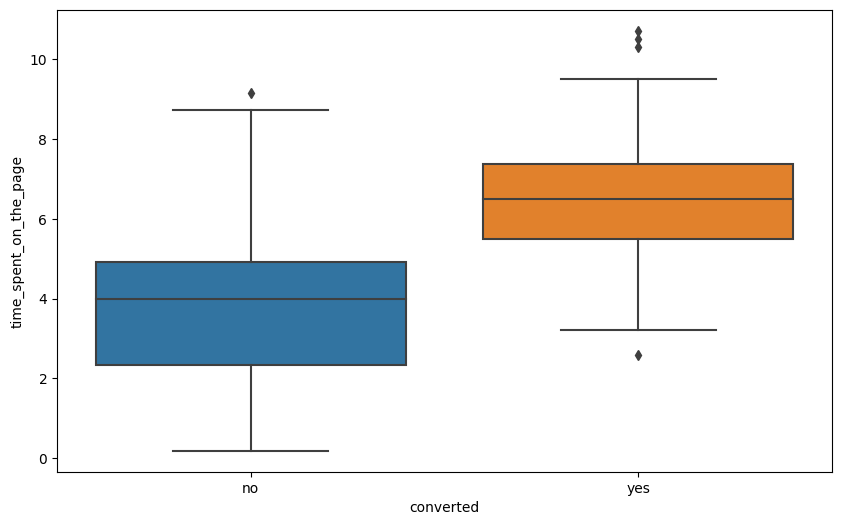

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')
plt.show()

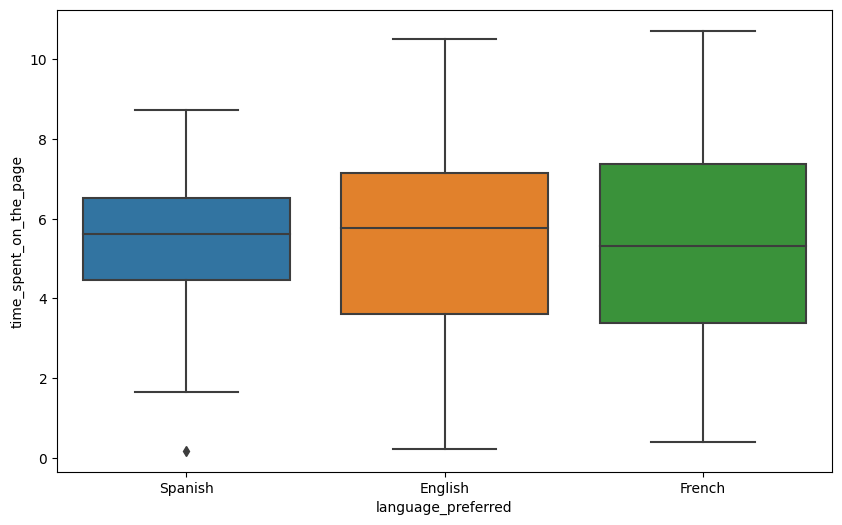

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page')
plt.show()

**Observations:**

*   People landed with new page spent more time than old page.
*   Converted people spent more time than the not converted people. There are some outliners, meaning spent more than 10 mins.
*   Even though Spanish is one of the preferred languages, less time is spent.



## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

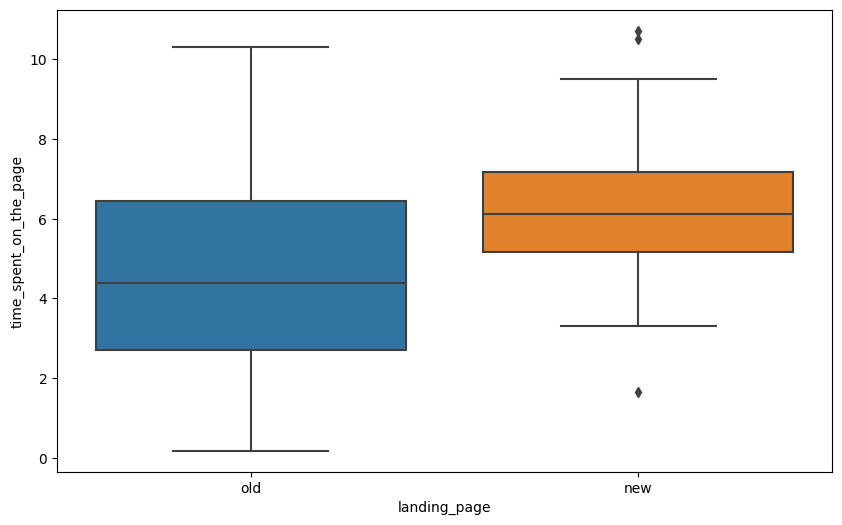

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

### Step 1: Define the null and alternate hypotheses

Let mu1 be the mean for old page and mu2 be the mean for new page

Null hypotheses - Ho is  mu1 = mu2

Alternate hypothese - Ha is  mu1 < mu2

In [9]:
df_new = df[df['landing_page'] == 'new']
df_old = df[df['landing_page'] == 'old']
# find the sample means and sample standard deviations for the two samples
print('The mean time spent on new page (mu2) is ' + str(df_new['time_spent_on_the_page'].mean()))
print('The mean time spent on old page (mu1) is ' + str(df_old['time_spent_on_the_page'].mean()))


The mean time spent on new page (mu2) is 6.2232
The mean time spent on old page (mu1) is 4.532400000000001


### Step 2: Select Appropriate test

Let's test whether the T-test assumptions are satisfied or not

*   Continuous data - Yes, the user activity is measured on a continuous scale.
*   Normally distributed populations - Yes, Based on the chart above, the population is assumed normal.
*   Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
*   Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
*   Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

*   We can use ***two sample T-test*** for this problem.



### Step 3: Decide the significance level

The significance level  = 5% or 0.05

### Step 4: Collect and prepare data

In [17]:
print('The standard deviation of time spent on new page is ' + str(round(df_new['time_spent_on_the_page'].std(), 2)))
print('The standard deviation of time spent on old page is ' + str(round(df_old['time_spent_on_the_page'].std(), 2)))

The standard deviation of time spent on new page is 1.82
The standard deviation of time spent on old page is 2.58


### Step 5: Calculate the p-value

In [16]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df_new['time_spent_on_the_page'], df_old['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [18]:
if (p_value < 0.05):
  print("p-value : ", p_value, " is less then level of significance")
else:
  print("p-value : ", p_value, " is greater then level of significance")


p-value :  0.0001392381225166549  is less then level of significance


### Step 7:  Draw inference

Since p-value is less than 5% significance level, the null hypothesis can be rejected. We do have enough evidence that users are spending more time on the new page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

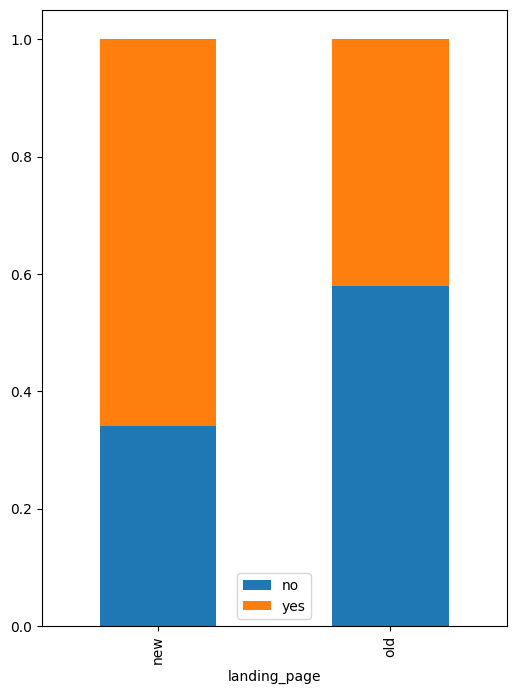

In [6]:
# Visual Analysis

pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

**Step 1: Null and Alternate hyposis**

Let mu1 be the mean for old page and mu2 be the mean for new page

Null hypotheses - Ho is mu1 = mu2, conversion rate for new page is same as old page

Alternate hypothese - Ha is mu1 < mu2, conversion rate for new page is greater than old page



**Step 2: Select Appropriate test**


Let us check if Two proportions z-test assumptions are satisfied

*   Binomially distributed populations - Yes either converted or not
*   Independent populations - Yes the populations are independent
*   Random sampling from the populations - Yes, we are informed that the collected sample is a simple random sample.
*   When both mean (np) and n(1-p) are greater than or equal to 10, the binomial distribution can be approximated by a normal distribution
*   Since the assumptions are satisfied, let us go with **Two proportions
z-test**






**Step 3: Decide the significance level**

The significance level  = 5% or 0.05

**Step 4: Collect data**

In [18]:
df_new_yes = df_new['converted'].value_counts()['yes']
df_old_yes = df_old['converted'].value_counts()['yes']

n_control = df.group.value_counts()['control']
n_treatment = df.group.value_counts()['treatment']

print("New page total: ", n_treatment, " and converted to yes : ", df_new_yes)
print("Old page total: ", n_control, " converted to yes : ", df_old_yes)


New page total:  50  and converted to yes :  33
Old page total:  50  converted to yes :  21


**Step 5: Calculate p-value**

In [20]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
converted_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


**Step 6: Compare the p-value with  α**


In [21]:
if (p_value < 0.05):
  print("p-value : ", p_value, " is less then level of significance")
else:
  print("p-value : ", p_value, " is greater then level of significance")

p-value :  0.016052616408112556  is less then level of significance


**Step 7:  Draw inference**

*Since p-value is less than 5% significance level, the null hypothesis can be rejected. We do have enough evidence that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page.*

## 3. Is the conversion and preferred language are independent or related?

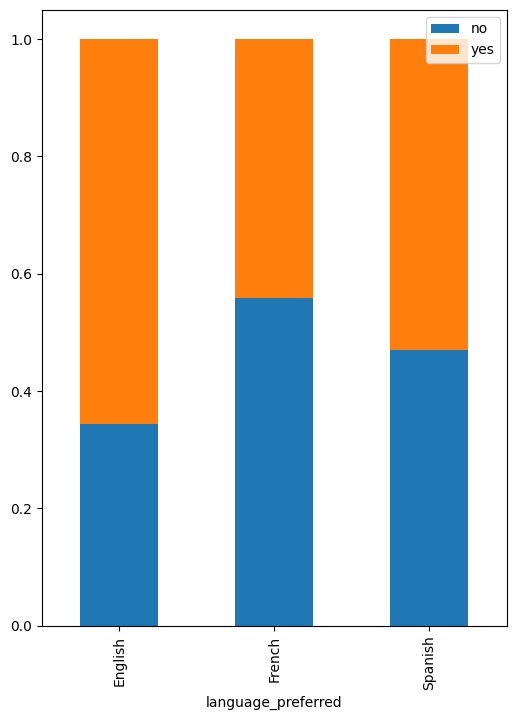

In [23]:
 # Visual Analysis

pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()


### Step 1: Define the null and alternate hypotheses

Ho (Null hyptheses) - The conversion and preferred language are independent

Ha (Alternate hypotheses) - The conversion and preferred language are not independent

### Step 2: Select Appropriate test

Since there are two categorical data is involved here for dependency test, we can use Chi-square test. Let us check if assumptions are satisfied

*   Categorical variables - Yes conversion and preferred language are categorial data
*   Expected value of the number of sample observations in each level of the variable is at least 5 - Yes we have 50 as sample count which is > 5
*   Random sampling from the population - Yes the data is randomly selected
*   We will use **Chi-square test of independence**






### Step 3: Decide the significance level

The significance level  = 5% or 0.05


### Step 4: Collect and prepare data

In [26]:
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [27]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [28]:
if (p_value < 0.05):
  print("p-value : ", p_value, " is less then level of significance")
else:
  print("p-value : ", p_value, " is greater then level of significance")

p-value :  0.2129888748754345  is greater then level of significance


### Step 7:  Draw inference

*Since p-value is greater than 5% significance level, the null hypothesis can not be rejected. We do not have enough evidence to say that preferred language and conversion are not independent.*

## 4. Is the time spent on the new page same for the different language users?

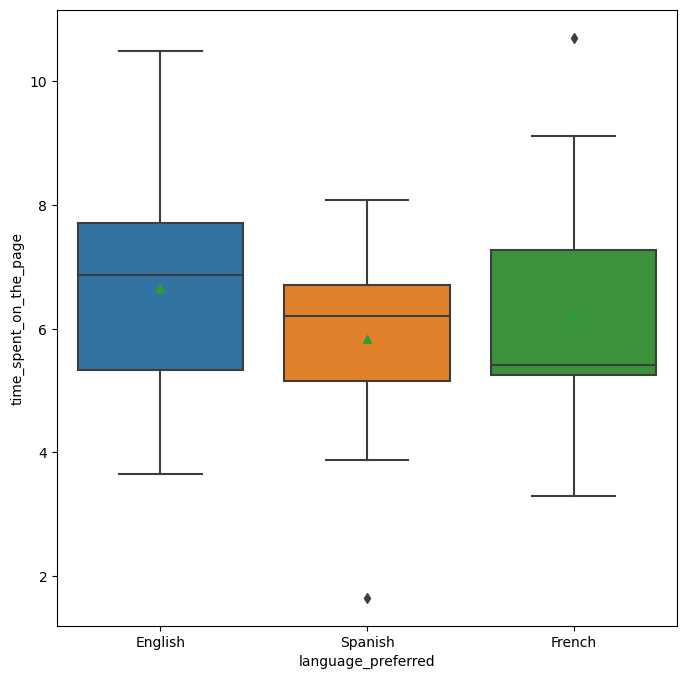

In [25]:
 # Visual Analysis

plt.figure(figsize=(8,8))
sns.boxplot(x ='language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

### Step 1: Define the null and alternate hypotheses


Ho (Null hyptheses) - *The mean time spent on the new page same for the different language users*

Ha (Alternate hypotheses) - *The mean time spent on the new page is different for at least one of the different language users*

### Step 2: Select Appropriate test

Analysis of Variance (ANOVA) is used to determine whether the means of more than two independent populations are significantly different. Here are the assumptions to consider ANOVA test.


*   The populations are normally distributed
*   Samples are independent simple random samples - Yes
*   Population variances are equal
*   We will do **One way ANOVA F-test**


### Step 3: Decide the significance level

The significance level  = 5% or 0.05

### Step 4: Collect and prepare data

In [30]:
# let us find the mean for the preferred languages

df_new.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

In [31]:
df_english_time = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
df_french_time = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
df_spanish_time = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']
df_spanish_time

2     4.40
4     4.75
12    5.86
15    6.27
24    6.18
38    1.65
42    7.16
47    7.23
48    8.08
52    6.47
54    6.41
68    6.70
77    3.88
82    5.74
95    5.15
97    7.07
98    6.20
Name: time_spent_on_the_page, dtype: float64

### Step 5: Calculate the p-value

In [34]:
# Importing library
from scipy.stats import f_oneway

(test_stat, p_value) = f_oneway(df_english_time, df_french_time, df_spanish_time)
print("p-value is : ", p_value)

p-value is :  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [35]:
if (p_value < 0.05):
  print("p-value : ", p_value, " is less then level of significance")
else:
  print("p-value : ", p_value, " is greater then level of significance")

p-value :  0.43204138694325955  is greater then level of significance


### Step 7:  Draw inference

*Since p-value is greater than 5% significance level, the null hypothesis can not be rejected. We do not have enough evidence to say that  the mean time spent on the new page is different for the different language users.*

## Conclusion and Business Recommendations

**EDA Report**

*   *Dataset has 100 rows and 6 columns*
*   *There are no null rows or columns in the dataset*
*   *There are no duplicates in the dataset*
*   *Two numeric data types are user_id, int64 and time_spent_on_the_page, float64. All other columns are object types*
*   *The mean time spent by all the users is 5.38. The average time spent by users on old page (control) is 4.53 and new page (treatment) is 6.22*
*   *Data is normally distributed*
*   *There are 54 users converted to new page and 46 are not.*
*   *Most of the users spent between 4 to 7 mins of their time.*
*   *French and Spanish are preferred languages than English.*
*   *People landed with new page spent more time than old page.*
*   *Converted people spent more time than the not converted people. There are some outliners, meaning spent more than 10 mins.*
*   *Even though Spanish is one of the preferred languages, less time is spent.*



**Inferences**



*   *Based on two sample T-test p_value, The users spend more time on the new landing page than the existing landing page*
*   *Based on two proportions z-test, the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.*
*   *Based on chi-square test of Independence, the conversion and preferred language are independent and not related.*
*   *Based on ANOVA F-test, the time spent on the new page is almost same for the different language users.*
*   *Based on above test results, it is understood that people spend more time on new page specially converted people spend more time.*





___